# Currency and FX

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 13
plt.rcParams['legend.fontsize'] = 13

from cmds.portfolio import performanceMetrics, tailMetrics

# Currency

Currency is traded on the **spot** market at the **exchange rate**.

## Market Size by Instrument (2022 Data)

**Total Daily FX Turnover: $7.6 trillion/day**

| **Instrument** | **Daily Volume** | **% of Total** | **Market Type** | **Source URL** |
|:---|---:|---:|:---|:---|
| **FX Swaps** | $3.8 trillion | 50.0% | OTC | [BIS D11.1 Tables](https://data.bis.org/topics/DER/tables-and-dashboards/BIS,DER_D11_1,1.0) |
| **Spot FX** | $2.1 trillion | 27.6% | OTC | [BIS D11.1 Tables](https://data.bis.org/topics/DER/tables-and-dashboards/BIS,DER_D11_1,1.0) |
| **Outright Forwards** | $1.1 trillion | 14.5% | OTC | [BIS D11.1 Tables](https://data.bis.org/topics/DER/tables-and-dashboards/BIS,DER_D11_1,1.0) |
| **FX Options (OTC)** | $0.3 trillion | 3.9% | OTC | [BIS D11.1 Tables](https://data.bis.org/topics/DER/tables-and-dashboards/BIS,DER_D11_1,1.0) |
| **Currency Swaps** | $0.15 trillion | 2.0% | OTC | [BIS D11.1 Tables](https://data.bis.org/topics/DER/tables-and-dashboards/BIS,DER_D11_1,1.0) |
| **FX Futures** | ~$0.1 trillion | ~1.3% | Exchange | [CME Group Reports](https://www.prnewswire.com/news-releases/cme-group-reports-record-average-daily-volume-of-23-3-million-contracts-traded-in-2022--an-increase-of-19-301712900.html) |
| **FX Options (Exchange)** | <$0.01 trillion | <0.1% | Exchange | [FIA Annual Survey](https://www.fia.org/marketvoice/articles/2021-annual-futures-and-options-volume-survey-brazil-china-and-india-drive) |

### Exchange-Traded FX Derivatives Note:
**Total exchange-traded FX volume (2021): 5.54 billion contracts** - includes both futures and options, but heavily weighted toward futures. Exchange-traded FX options volume is minimal compared to OTC ($300B/day vs <$10B/day estimated).

## Key Market Features
* **OTC completely dominates:** 98.6%+ of FX trading is over-the-counter
* **FX Swaps largest:** Short-term funding swaps are half the market
* **Exchange-traded tiny but growing:** Futures +24% in 2022, but still <2% of total
* **Options mostly OTC:** Exchange-traded FX options <0.1% of total market
* **Geographic concentration:** 78% of trading in 5 centers (UK 38%, US 19%, Singapore 9%, Hong Kong 7%, Japan 4%)

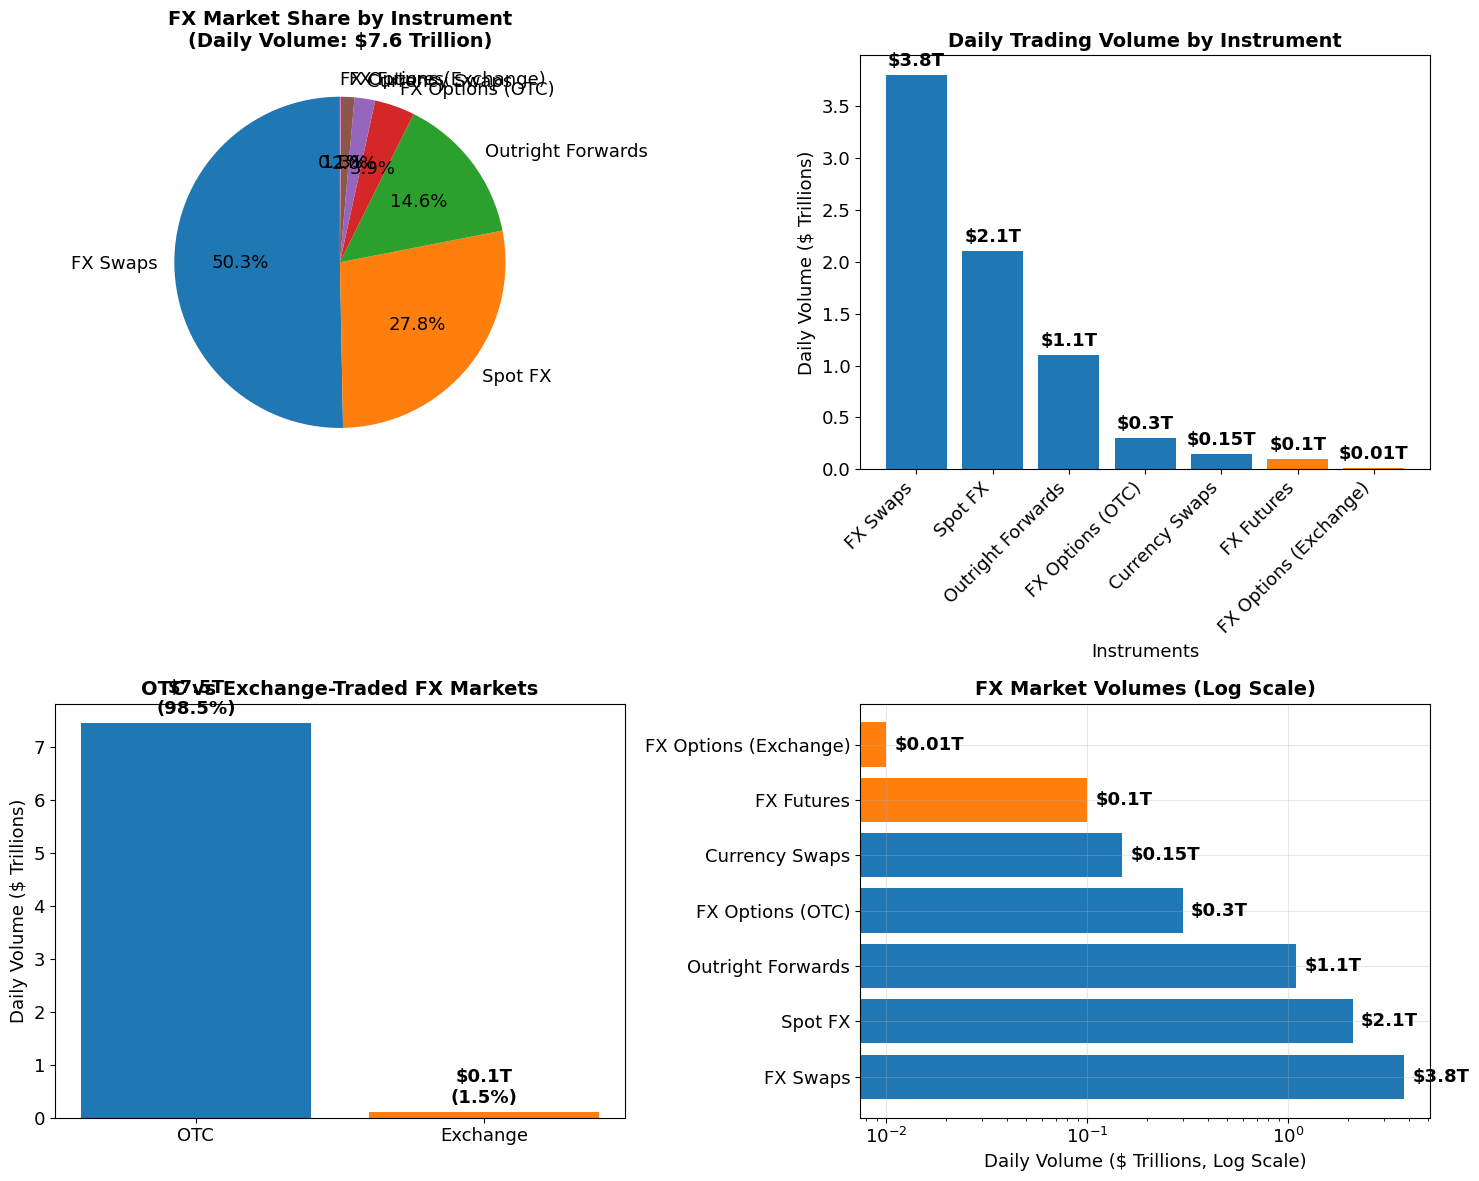

In [ ]:
# FX Market Size Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Market size data (daily volumes in trillion USD)
fx_data = {
    'Instrument': ['FX Swaps', 'Spot FX', 'Outright Forwards', 'FX Options (OTC)', 
                   'Currency Swaps', 'FX Futures', 'FX Options (Exchange)'],
    'Volume_Trillions': [3.8, 2.1, 1.1, 0.3, 0.15, 0.1, 0.01],
    'Market_Type': ['OTC', 'OTC', 'OTC', 'OTC', 'OTC', 'Exchange', 'Exchange'],
    'Percentage': [50.0, 27.6, 14.5, 3.9, 2.0, 1.3, 0.1]
}

fx_df = pd.DataFrame(fx_data)

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Pie Chart - Overall Market Share
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
wedges, texts, autotexts = ax1.pie(fx_df['Percentage'], labels=fx_df['Instrument'], 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('FX Market Share by Instrument\n(Daily Volume: $7.6 Trillion)', fontsize=14, fontweight='bold')

# 2. Bar Chart - Volume by Instrument
bars = ax2.bar(range(len(fx_df)), fx_df['Volume_Trillions'], 
               color=['#1f77b4' if x == 'OTC' else '#ff7f0e' for x in fx_df['Market_Type']])
ax2.set_title('Daily Trading Volume by Instrument', fontsize=14, fontweight='bold')
ax2.set_xlabel('Instruments')
ax2.set_ylabel('Daily Volume ($ Trillions)')
ax2.set_xticks(range(len(fx_df)))
ax2.set_xticklabels(fx_df['Instrument'], rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(fx_df['Volume_Trillions']):
    ax2.text(i, v + 0.05, f'${v}T', ha='center', va='bottom', fontweight='bold')

# 3. OTC vs Exchange Comparison
otc_total = fx_df[fx_df['Market_Type'] == 'OTC']['Volume_Trillions'].sum()
exchange_total = fx_df[fx_df['Market_Type'] == 'Exchange']['Volume_Trillions'].sum()

market_comparison = pd.DataFrame({
    'Market Type': ['OTC', 'Exchange'],
    'Volume': [otc_total, exchange_total],
    'Percentage': [otc_total/(otc_total+exchange_total)*100, exchange_total/(otc_total+exchange_total)*100]
})

bars3 = ax3.bar(market_comparison['Market Type'], market_comparison['Volume'], 
                color=['#1f77b4', '#ff7f0e'])
ax3.set_title('OTC vs Exchange-Traded FX Markets', fontsize=14, fontweight='bold')
ax3.set_ylabel('Daily Volume ($ Trillions)')
for i, v in enumerate(market_comparison['Volume']):
    ax3.text(i, v + 0.1, f'${v:.1f}T\n({market_comparison["Percentage"].iloc[i]:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

# 4. Log Scale View (to show smaller instruments better)
ax4.barh(fx_df['Instrument'], fx_df['Volume_Trillions'], 
         color=['#1f77b4' if x == 'OTC' else '#ff7f0e' for x in fx_df['Market_Type']])
ax4.set_xscale('log')
ax4.set_title('FX Market Volumes (Log Scale)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Daily Volume ($ Trillions, Log Scale)')
ax4.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(fx_df['Volume_Trillions']):
    ax4.text(v * 1.1, i, f'${v}T', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Exchange-Traded FX Options Analysis:

**1. Total Exchange-Traded FX Volume (All Instruments):**
- **2021 Global Total:** 5.54 billion contracts ([FIA Survey](https://www.fia.org/marketvoice/articles/2021-annual-futures-and-options-volume-survey-brazil-china-and-india-drive))
- **Heavily skewed toward futures** (not options)

**2. Exchange-Traded Options are Tiny:**
- **Estimated daily volume:** <$10 billion (vs $300B OTC options)
- **Market share:** <0.1% of total FX market
- **Why so small?**
  - Standardization constraints
  - Limited currency pairs available
  - Institutional preference for OTC customization
  - Higher liquidity in OTC markets

**3. Key Exchanges for FX Options:**
- CME Group (dominant in FX futures, minimal options)
- ICE Futures
- Eurex (some currency options)

### **Conclusion:** 
Exchange-traded FX options exist but are economically insignificant. The OTC market dominates because:
- **Customization:** Tailored strikes, expiries, currencies
- **Size:** Institutional-size transactions
- **Liquidity:** 24/7 global OTC market vs exchange hours
- **Cost:** Lower transaction costs for large trades

**The $300 billion/day in OTC FX options captures >99.9% of the options market.**

# Data

## Exchange rates
Spot exchange rates.

In [ ]:
DATAPATH_FX = '../data/fx_data_index.xlsx'
SHEET = 'exchange rates'
fxraw = pd.read_excel(DATAPATH_FX, sheet_name=SHEET).set_index('date')

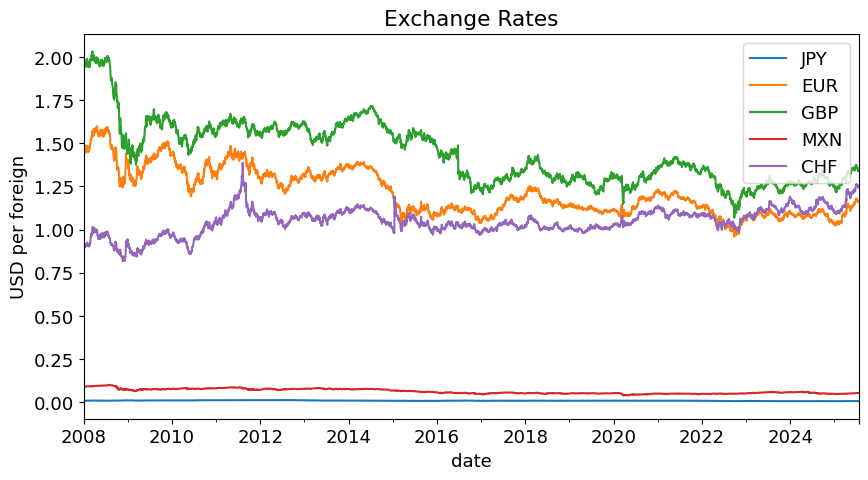

In [ ]:
fxraw.plot(title='Exchange Rates',ylabel='USD per foreign',figsize=(10,5));

### Direct vs Indirect

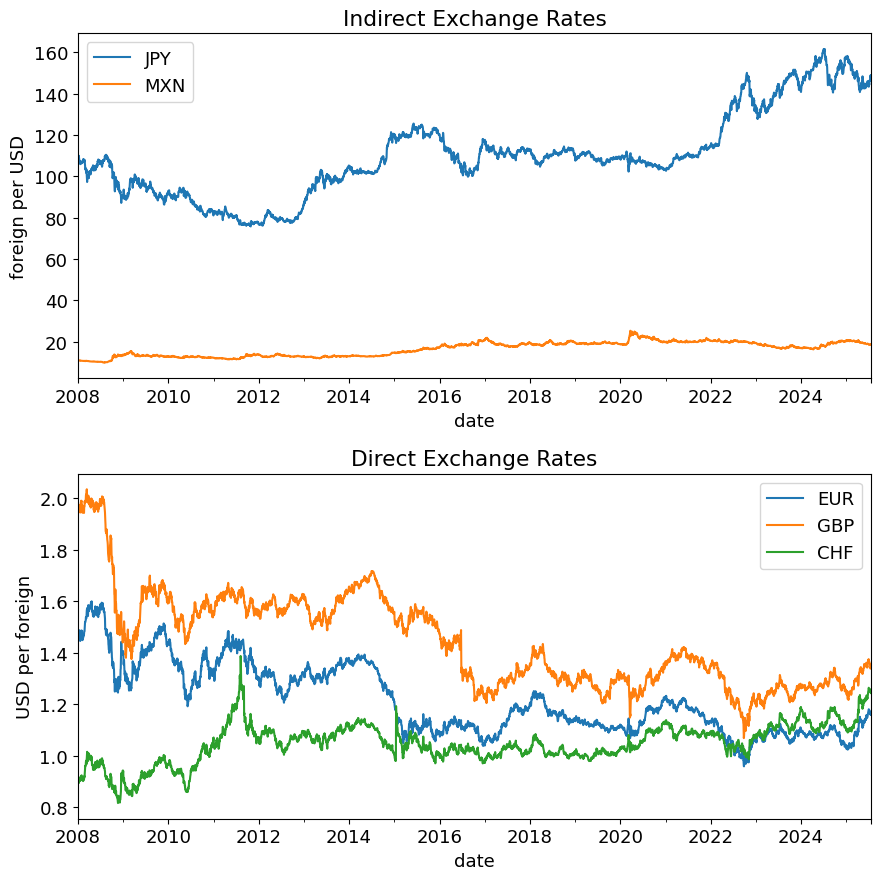

In [ ]:
idx_direct = fxraw.mean(axis=0) < .1
idx_indirect = fxraw.mean(axis=0) > .1

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,9), sharey=False)

(1/fxraw.loc[:, idx_direct]).plot(ax=ax1, title='Indirect Exchange Rates', ylabel='foreign per USD')
fxraw.loc[:, idx_indirect].plot(ax=ax2, title='Direct Exchange Rates', ylabel='USD per foreign')

plt.tight_layout()
plt.show()

### Quote Conventions

| Instrument   | Quote Convention                               |
|--------------|------------------------------------------------|
| Spot FX      | Mix (whichever historically was above 1)|
| FX Forwards  | Mix (follows spot conventions for each pair)   |
| FX Futures   | American terms (USD per unit of foreign)       |
| FX Options   | American terms (USD per unit of foreign)       |

# Goldman's Warrant Formula Error: A Cautionary Tale

In February 2011, Goldman Sachs launched Nikkei warrants in Hong Kong with a **critical typo** in the settlement formula. Instead of **dividing** by the JPY/HKD exchange rate, the documentation said to **multiply** by it.

This error was caught and corrected two months later, but it illustrates how a simple mistake can have massive financial consequences.

### The Error: Indirect vs Direct

**Correct Formula:**

Settlement = (Strike - Closing) × Amount <span style="color: red; font-weight: bold;">÷</span> Exchange Rate

**Erroneous Formula (as published):**

Settlement = (Strike - Closing) × Amount <span style="color: red; font-weight: bold;">×</span> Exchange Rate

### Impact:

Let's see what happened with Goldman's (ID #10075) Put Warrants expiring `September 9, 2011`:

| **Market Data**    | **Value**                             |
|:-------------------|--------------------------------------:|
| Strike Level       | **10,000** points      |
| Nikkei Closing     | **8,737.66** points  |
| Intrinsic Value    | **1,262.34** points                   |
| Currency Amount    | **350** JPY per point   |
| Exchange Rate      | **9.9264** JPY/HKD  |

In [ ]:
GSHK = pd.DataFrame([1000,10000,1/350,10000,8737.66,9.9264,7.85],index=['total lots','lot size','multiplier per lot','index strike','index close','JPY/HKD','HKD per USD'],columns=['Feb 2011'])
GSHK.style.format('{:,.2f}')

In [ ]:
value = pd.DataFrame(
    [
        GSHK.loc['index strike', 'Feb 2011'] - GSHK.loc['index close', 'Feb 2011']
    ],
    index=['intrinsic value'],
    columns=['correct']
)
value.loc['intrinsic value', 'incorrect'] = value.loc['intrinsic value', 'correct']

value.loc['yen per warrant', 'correct']   = value.loc['intrinsic value', 'correct'] * GSHK.loc['multiplier per lot', 'Feb 2011']
value.loc['yen per warrant', 'incorrect'] = value.loc['intrinsic value', 'correct'] * GSHK.loc['multiplier per lot', 'Feb 2011']

value.loc['FX rate JPY per HKD', 'correct']   = GSHK.loc['JPY/HKD', 'Feb 2011']
value.loc['FX rate JPY per HKD', 'incorrect'] = 1 / GSHK.loc['JPY/HKD', 'Feb 2011']

value.loc['HKD per warrant', 'correct']   = value.loc['yen per warrant', 'correct'] / value.loc['FX rate JPY per HKD', 'correct']
value.loc['HKD per warrant', 'incorrect'] = value.loc['yen per warrant', 'incorrect'] / value.loc['FX rate JPY per HKD', 'incorrect']

value.loc['HKD per lot', 'correct']       = value.loc['HKD per warrant', 'correct'] * GSHK.loc['lot size', 'Feb 2011']
value.loc['HKD per lot', 'incorrect']     = value.loc['HKD per warrant', 'incorrect'] * GSHK.loc['lot size', 'Feb 2011']

value.loc['HKD total issue', 'correct']   = value.loc['HKD per lot', 'correct'] * GSHK.loc['total lots', 'Feb 2011']
value.loc['HKD total issue', 'incorrect'] = value.loc['HKD per lot', 'incorrect'] * GSHK.loc['total lots', 'Feb 2011']

value.loc['USD exposure', 'correct']   = value.loc['HKD total issue', 'correct'] / GSHK.loc['HKD per USD', 'Feb 2011']
value.loc['USD exposure', 'incorrect'] = value.loc['HKD total issue', 'incorrect'] / GSHK.loc['HKD per USD', 'Feb 2011']

# Format for display
display(value.style.format('{:,.2f}'))

#### Sources

Term Sheet

https://www.hkexnews.hk/listedco/listconews/sehk/2011/0211/ltn20110211616_c.pdf

HKEX Amendment Notice LTN20110331323, March 31, 2011*

https://www.hkexnews.hk/listedco/listconews/sehk/2011/0331/ltn20110331323.pdf
https://www.hkexnews.hk/listedco/listconews/sehk/2011/0331/ltn20110331323.pdf

News articles

https://www.ft.com/content/cd3551ea-3600-3d92-8382-a44b6d13dbf4

https://web.archive.org/web/20110806060938/https://www.businessinsider.com/a-typo-by-goldman-sachs-just-cost-the-bank-45-million-instead-of-13-million-2011-5

# Risk-free rates
The data reports the risk-free rates for various currencies.

### Data Source: Overnight Deposit vs Index

* With LIBOR, there was a set of risk-free rates under a single, consistent methodology.
* Now, we are left to get a rate from each specific currency.
* Where possible, we are choosing the Bloomberg overnight deposit rate.
* For some currencies, that data seems suspect, and we use an index.

In [ ]:
SHEET = 'sources'
sources = pd.read_excel(DATAPATH_FX,sheet_name=SHEET).set_index('ticker')
display(sources.style.format(na_rep='').set_caption('Sources for Risk-free Rates'))


#### Data Note: Timing
- The data is defined such that the March value of the risk-free rate corresponds to the rate beginning in March and ending in April.
- In terms of the class notation, $r^{f,i}_{t,t+1}$ is reported at time $t$. (It is risk-free, so it is a rate from $t$ to $t+1$ but it is know at $t$.

In [ ]:
SHEET = 'risk-free rates'
rfraw = pd.read_excel(DATAPATH_FX,sheet_name=SHEET).set_index('date')
rfraw.tail().style.format('{:.2%}').format_index(lambda x: x.strftime('%Y-%m-%d'))

### Visualizing the Data

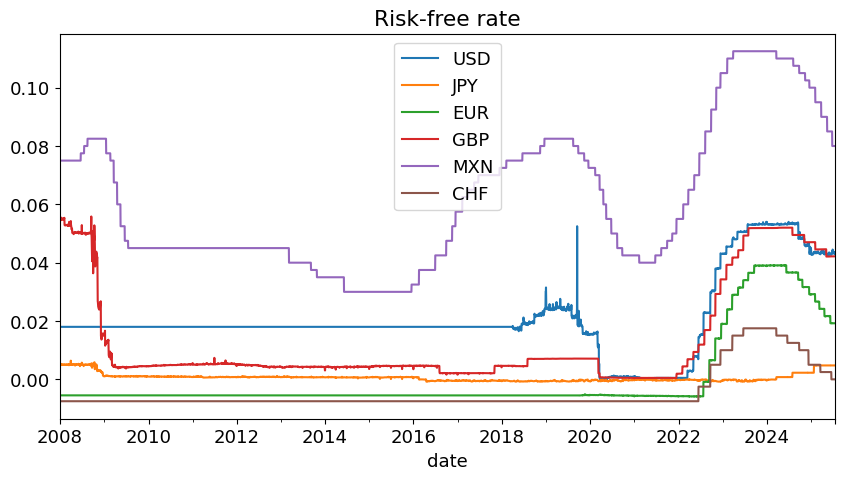

In [ ]:
rfraw.plot(title='Risk-free rate',figsize=(10,5));

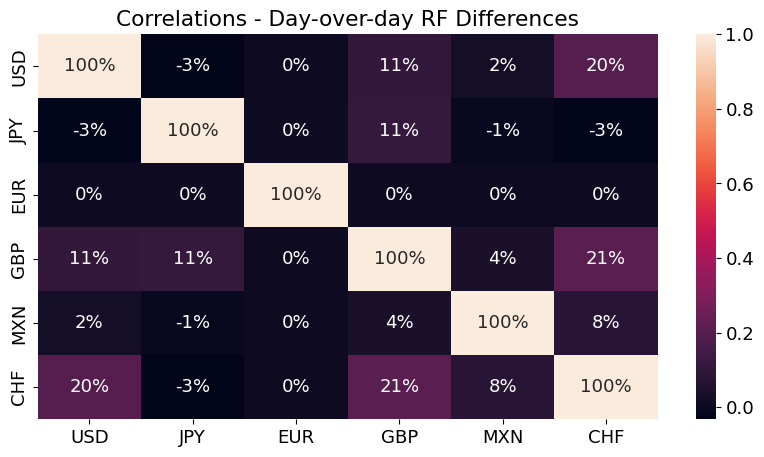

In [ ]:
sns.heatmap(rfraw.diff().corr(),annot=True,fmt='.0%')
plt.title('Correlations - Day-over-day RF Differences')
plt.show()

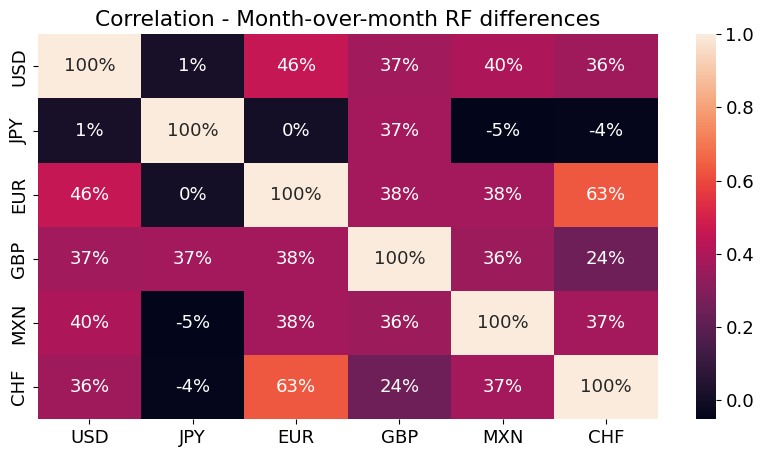

In [ ]:
temp = rfraw.resample('ME').last()
sns.heatmap(temp.diff().corr(),annot=True,fmt='.0%')
plt.title('Correlation - Month-over-month RF differences')
plt.show()

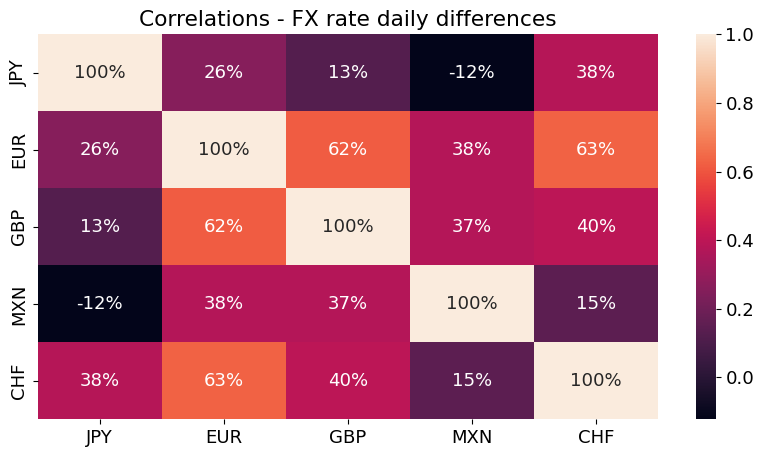

In [ ]:
sns.heatmap(fxraw.diff().corr(),annot=True,fmt='.0%')
plt.title('Correlations - FX rate daily differences');

# Returns on Holding Currency

### Notation

* $S_t$ denotes the foreign exchange rate, expressed as USD per foreign currency
* $\RF_{t,t+1}$ denotes the risk-free factor on US dollars (USD).
* $\RFa_{t,t+1}$ denotes the risk-free factor on a particular foreign currency.

### Two components to returns

Misconception that the return on currency is the percentage change in the exchange rate:

$$\frac{S_{t+1}}{S_t}$$

The price of the currency is $S_t$ dollars.
* In terms of USD, the payoff at time t + 1 of the Euro riskless asset is 

$$\RFa_{t,t+1} S_{t+1}$$

That is, 
* we capitalize any FX gains, 
* but we also earn the riskless return accumulated by the foreign currency.

Thus, the USD return on holding Euros is given by,

$$\RFa_{t,t+1}\frac{ S_{t+1}}{S_t}$$

In [ ]:
shared_indexes = rfraw.index.intersection(fxraw.index)

# Split the merged DataFrame back into the original two DataFrames with shared indexes
rf = rfraw.loc[shared_indexes,:]
fx = fxraw.loc[shared_indexes,:]

In [ ]:
USDRF = 'USD'

DAYS = fx.resample('YE').size().median()
rf /= DAYS

rfusd = rf[[USDRF]]
rf = rf.drop(columns=[USDRF])

fxgrowth = (fx / fx.shift())
rets = fxgrowth.mul(1+rf.values,axis=1) - 1
rx = rets.sub(rfusd.values,axis=1)

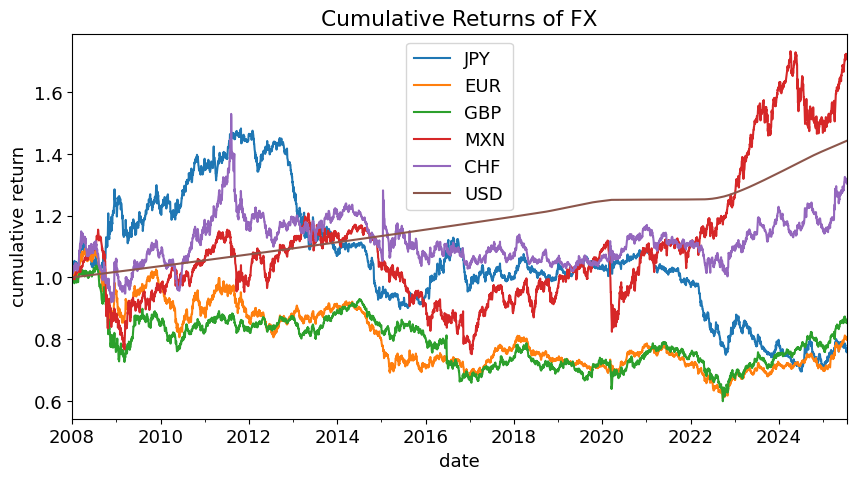

In [ ]:
fig, ax = plt.subplots()
(1+rets).cumprod().plot(ax=ax)
(1+rfusd).cumprod().plot(ax=ax)
plt.title('Cumulative Returns of FX')
plt.ylabel('cumulative return')
plt.figsize=(10,5)
plt.show()

### Extra Statistics on Returns

Main takeaway:
* small mean return--only exciting if you use leverage
* substantial volatility
* large drawdowns (tail-events)

In [ ]:
tabmets = performanceMetrics(rx,annualization=DAYS)[['Mean','Vol','Min','Max']]
pd.concat([tabmets,tailMetrics(rets)['Max Drawdown']],axis=1).style.format('{:.1%}').set_caption('Daily Excess Returns - Currency')

## Decomposing the Returns

Using logs, we can split out the two components of excess log returns

### Logarithms
The data is mostly analyzed in logs, as this simplifies equations later.
* For monthly rates, logs vs levels won't make a big difference.

### Excess returns

The (USD) return in excess of the (USD) risk-free rate is then

$$\tilde{r}^i_{t+1} \equiv \fxlog^i_{t+1} - \fxlog^i_t + r^{f,i}_{t,t+1} - r^{f,\$}_{t,t+1}$$

### Two spreads

For convenience, rewrite this as

$$\tilde{r}^i_{t+1} \equiv \left(\fxlog^i_{t+1} - \fxlog^i_t\right) + (\rfalog_{t,t+1} - \rflog_{t,t+1})$$

#### Data Consideration

1. Build the spread in risk-free rates: 

$$\rflog_{t,t+1} - \rfalog_{t,t+1}$$

Lag this variable, so that the March-to-April value is stamped as April.

2. Build the FX growth rates: 

$$\fxlog^i_{t+1} - \fxlog^i_t$$

These are already stamped as April for the March-to-April FX growth.

Then the excess log return is simply the difference of the two objects.

In [ ]:
logFX = np.log(fx)
logRFraw = np.log(rfraw+1)
logRFusd = logRFraw[[USDRF]]
logRF = logRFraw.drop(columns=[USDRF])

logRFusd = np.log(rfusd+1)
logRF = np.log(rf+1)

logRFspread = -logRF.subtract(logRFusd.values,axis=0)
logRFspread = logRFspread.shift(1)

logFXgrowth = logFX.diff(axis=0)

logRX = logFXgrowth - logRFspread.values

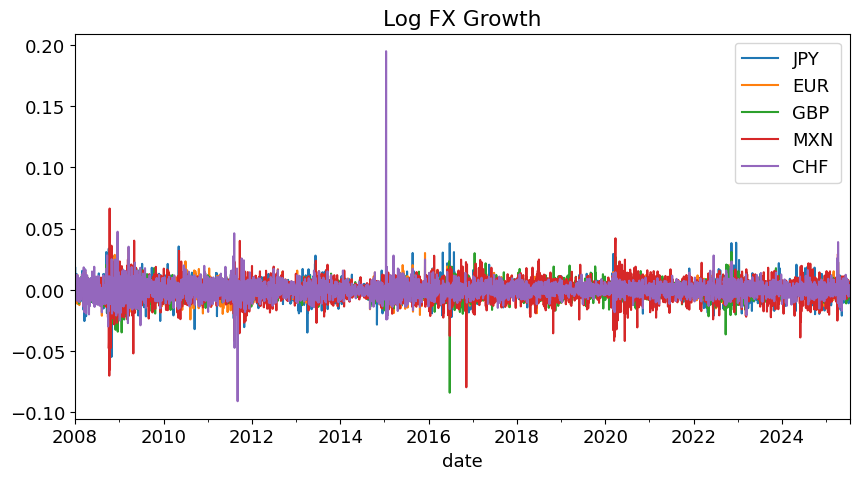

In [ ]:
logFXgrowth.plot(title='Log FX Growth', figsize=(10,5))
plt.show()

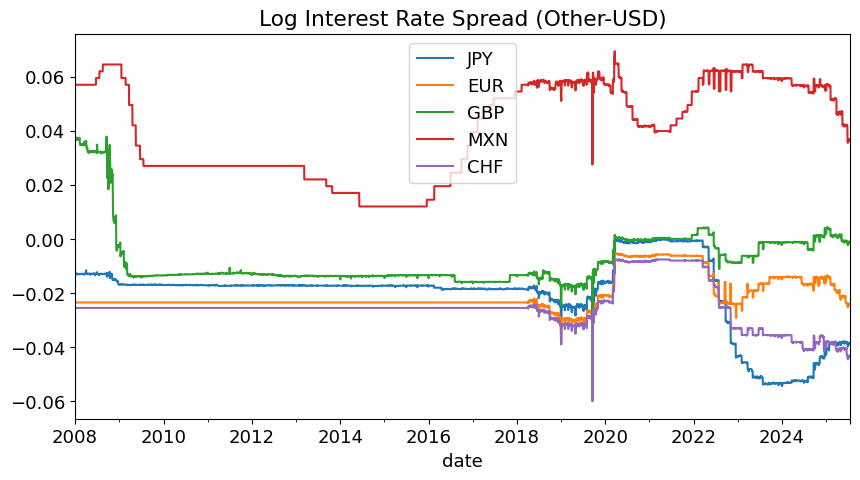

In [ ]:
(-logRFspread*DAYS).plot(title='Log Interest Rate Spread (Other-USD)', figsize=(10,5));

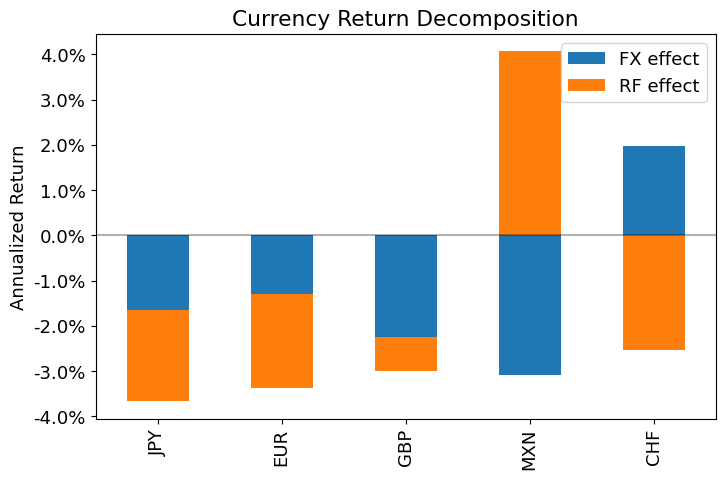

In [ ]:
rx_components = logFXgrowth.mean().to_frame()
rx_components.columns=['FX effect']
rx_components['RF effect'] = -logRFspread.mean().values
rx_components['Total'] = rx_components.sum(axis=1)
rx_components *= DAYS

ax = rx_components[['FX effect', 'RF effect']].plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Currency Return Decomposition')
plt.ylabel('Annualized Return')
plt.axhline(0, color='black', alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.show()

display(rx_components.style.format('{:.2%}'))

***

# Carry Trade: EUR-CHF

Consider a trade...
* **long** `EUR`
* **short** `CHF`

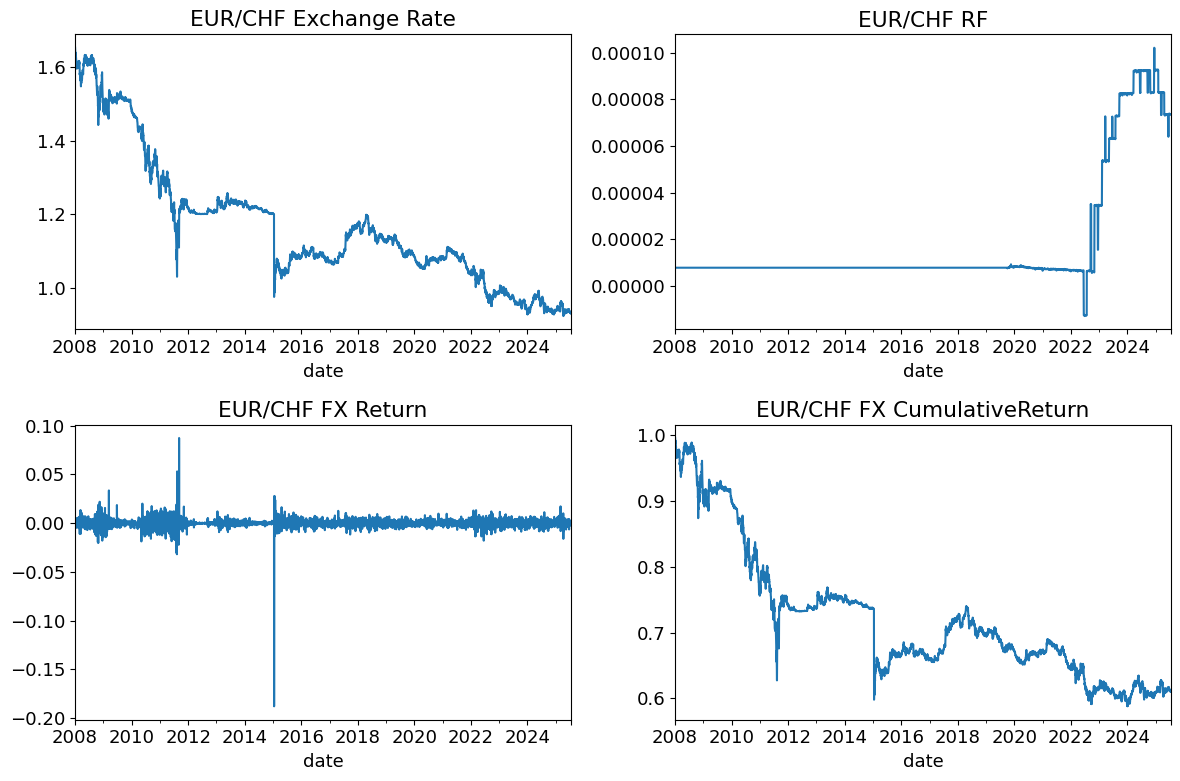

In [ ]:
EUR_CHF = (fx['EUR'] / fx['CHF'])
EUR_CHF_RF = (rf['EUR'] - rf['CHF'])
EUR_CHF_RETS = (1+EUR_CHF.pct_change()) * (1+rf['EUR']) - (1+rf['CHF'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Plot each series on its respective subplot
EUR_CHF.plot(ax=ax1, title='EUR/CHF Exchange Rate')
EUR_CHF_RF.plot(ax=ax2, title='EUR/CHF RF')
EUR_CHF_RETS.plot(ax=ax3, title='EUR/CHF FX Return')
(1+EUR_CHF_RETS).cumprod().plot(ax=ax4, title='EUR/CHF FX Cumulative Return')

plt.tight_layout()
plt.show()

***

# Covered Interest Parity

### Currency Forwards

Let $\Fcrncy_t$ denote the forward rate on the one-period FX contract, $S_{t+1}$.
* The forward FX rate, $\Fcrncy$, is a rate contracted at time t regarding the exchange of currency at some future time, t + k .
* Here, we just consider one-period forward rates. That is, where $T_2$ is $T_1+1$.
* The superscript \$ is simply to distinguish this as an FX forward versus an interest rate forward.

### Pricing Equation
**Covered Interest Parity** is a market relationship between exchange rates and risk-free rates.

$$\frac{\Fcrncy_t}{S_t}\RFa_{t,t+1} = \RF_{t,t+1}$$

In logs,

$$\fcrncylog_t - \fxlog_t + \rfalog_{t,t+1} = \rflog_{t,t+1}$$

or rather, the forward-premium equals the interest rate differential:

$$\frac{\Fcrncy_t}{S_t} = \frac{\RF_{t,t+1}}{\RFa_{t,t+1}}$$

$$\fcrncylog_t - \fxlog_t = \rflog_{t,t+1} - \rfalog_{t,t+1}$$

### CIP and No Arbitrage

Consider two ways of moving USD from t to t + 1. 
1. Invest in the USD risk-free rate.
2. Invest in the Euro risk-free rate.
    - Buy Euros, invest in the Euro risk-free rate
    - simultaneously use a forward contract to lock in the time t + 1 price of selling the Euros back for USD.

The second strategy replicates the first, so CIP follows just from no arbitrage, (Law of One Price.)

## Takeaway

Due to Covered Interest Parity,
* Pricing the forward on FX is easy: just look at the current exchange rate and the interest rate differential.
* The forward premium (spread between forward and spot) is often used to measure the difference in interest rates across countries.

***

# Cryptocurrency

## Crypto Data

For a more thorough description of Crypto, see the references below.

Here, we simply look at the data of the 4 largest cryptocurrencies.

In [ ]:
LOADFILE = '../data/crypto_data.xlsx'
crypto = pd.read_excel(LOADFILE,sheet_name='prices').set_index('Date')
crypto.index = pd.to_datetime(crypto.index)
crypto.columns = crypto.columns.str.split('-').str[0]

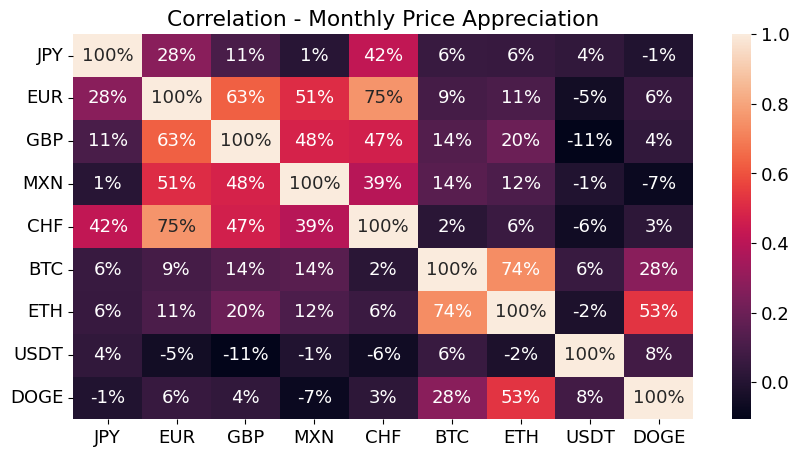

In [ ]:
currency = pd.concat([fx,crypto],axis=1)

sns.heatmap(currency.resample('ME').last().pct_change(fill_method=None).corr(),annot=True,fmt='.0%');
plt.title('Correlation - Monthly Price Appreciation');

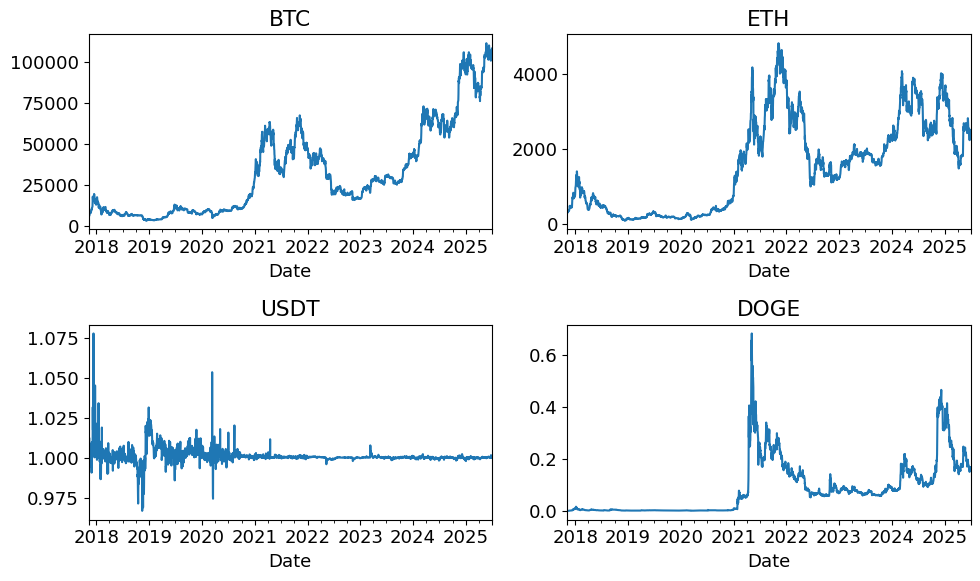

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
for i, col in enumerate(crypto.columns):
    crypto[col].plot(ax=ax[int(i/2),i%2], title=col)

plt.tight_layout()
plt.show()

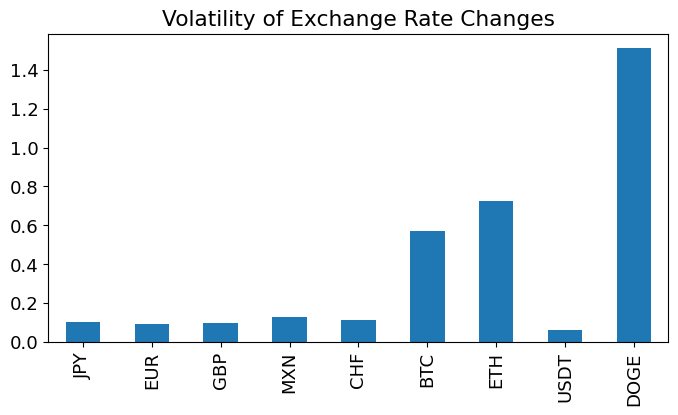

In [ ]:
ANNUALIZE= np.sqrt(252)
(currency.pct_change(fill_method=None).std()*ANNUALIZE).plot.bar(title='Volatility of Exchange Rate Changes',figsize=(8,4))
plt.show()